In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.impute import KNNImputer
%matplotlib inline

data=pd.read_csv('firstclean.csv')

In [3]:
data.dropna(axis=1,how='all',inplace=True)

In [4]:
data.shape

(555936, 13)

In [5]:
L=data.columns.tolist()

In [6]:
data=data[L[1:]]
data.head()

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,1.840
1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,NaN,0.9,0.42,0.168
2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,0.040
3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,0.000
4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,NaN,1.9,0.27,0.108


In [7]:
#On regarde juste les corrélations sel/sodium qui ont l'air très élevée ce qui semblerait cohérent
import scipy.stats as st
st.pearsonr(data.dropna(subset=['salt_100g','sodium_100g'],how='any')['salt_100g'],data.dropna(subset=['salt_100g','sodium_100g'],how='any')['sodium_100g'])[0]

0.999983779632344

In [8]:
#On va supprimer le sodium avant d'imputer les informations manquantes
data.drop(['sodium_100g'], axis = 1,inplace=True)

In [9]:
data.head(1)

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.6


In [10]:
#On fait déja un premier tableau en imputant les valeurs manquantes avec 0
data0=data.fillna(0)

In [11]:
data0.head()

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60
1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,0.0,0.9,0.42
2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10
3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00
4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,0.0,1.9,0.27


# On fait maintenant 2 knn imputer, in 3nn et un 1nn pour comparer les traitements

In [ ]:
imputer = KNNImputer(n_neighbors=1)
#Dans la mesure où les données énergy sont beaucoup plus grandes que les autres, on commence par un knn sur les seuls ingrédients
data1=imputer.fit_transform(data[data.columns.tolist()[4:]])

In [53]:
data1.to_csv('1nn.csv')


In [21]:
imputer3 = KNNImputer(n_neighbors=3)
#Dans la mesure où les données énergy sont beaucoup plus grandes que les autres, on commence par un knn sur les seuls ingrédients
data3=imputer3.fit_transform(data[data.columns.tolist()[4:]])

In [47]:
data3=pd.DataFrame(data3)


In [ ]:
#On recrée nos tableaux avec les autres valeurs
data1['energy_100g']=np.array(data['energy_100g'])
data3['energy_100g']=np.array(data['energy_100g'])

In [18]:
data3.head()

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.000000,5.1,4.60
1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,0.933333,0.9,0.42
2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.400000,4.6,0.10
3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.600000,0.6,0.00
4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,0.000000,1.9,0.27


In [22]:
#On traite maintenant les valeurs manquantes en energy
data1nn=imputer.fit_transform(data1[data1.columns.tolist()[3:]])

In [23]:
data3nn=imputer3.fit_transform(data3[data3.columns.tolist()[3:]])

In [83]:
#On reconstitue les tableaux

In [24]:
data1nn=pd.DataFrame(data1nn)
data3nn=pd.DataFrame(data3nn)

In [25]:
data1nn.columns=data1.columns.tolist()[3:]
data3nn.columns=data3.columns.tolist()[3:]
data1nn.head()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60
1,134.0,0.3,0.1,5.3,3.9,0.8,0.9,0.42
2,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10
3,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00
4,598.0,12.7,1.0,3.9,1.0,0.0,1.9,0.27


In [26]:
data1.head()

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60
1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,0.8,0.9,0.42
2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10
3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00
4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,0.0,1.9,0.27


In [27]:
for i in range(3):
    data1nn[data.columns.tolist()[i]]=np.array(data[data.columns.tolist()[i]])
    data3nn[data.columns.tolist()[i]]=np.array(data[data.columns.tolist()[i]])

In [28]:
data1nn.head()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,code,product_name,nutriscore_score
0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,0000000000100,moutarde au moût de raisin,18.0
1,134.0,0.3,0.1,5.3,3.9,0.8,0.9,0.42,0000000000949,Salade de carottes râpées,1.0
2,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,0000000001281,Tarte noix de coco,14.0
3,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,0000000001885,Compote de poire,-2.0
4,598.0,12.7,1.0,3.9,1.0,0.0,1.9,0.27,0000000002257,Salade de macedoine de légumes,1.0


In [29]:
data1nn=data1nn[data.columns.tolist()]
data3nn=data3nn[data.columns.tolist()]

In [30]:
data1nn.head()

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60
1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,0.8,0.9,0.42
2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10
3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00
4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,0.0,1.9,0.27


In [31]:
data1nn.to_csv('1nn.csv')
data3nn.to_csv('3nn.csv')

In [32]:
data1=pd.read_csv('1nn.csv')
data3=pd.read_csv('3nn.csv')

In [33]:
data1.head()

,Unnamed: 0,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60
1,1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,0.8,0.9,0.42
2,2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10
3,3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00
4,4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,0.0,1.9,0.27


In [34]:
del data1['Unnamed: 0']
del data3['Unnamed: 0']

In [35]:
data3.isnull().sum()

code                     0
product_name          2066
nutriscore_score         0
energy_100g              0
fat_100g                 0
saturated-fat_100g       0
carbohydrates_100g       0
sugars_100g              0
fiber_100g               0
proteins_100g            0
salt_100g                0
dtype: int64

In [36]:
raw_data=pd.read_csv('befclean.csv')

/home/samuel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
raw_data.head()
del raw_data['Unnamed: 0']

In [38]:
raw_data.head()

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,1.840
1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,NaN,0.9,0.42,0.168
2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,0.040
3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,0.000
4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,NaN,1.9,0.27,0.108


In [41]:
del raw_data['sodium_100g']

In [39]:
data3.describe()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,555936.000000,555936.000000,555936.000000,555936.000000,555936.000000,555936.000000,555936.000000,555936.000000,555936.000000
mean,9.033804,1107.531535,12.823357,4.903309,28.857571,13.160436,2.055629,8.258904,0.898256
std,8.923360,721.547579,13.861021,6.530418,27.021985,17.622792,2.672193,7.963111,1.057403
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,436.000000,1.060000,0.100000,4.800000,1.000000,0.000000,2.300000,0.100000
50%,10.000000,1067.000000,7.754310,2.000000,17.650000,4.350000,1.100000,6.100000,0.620000
75%,16.000000,1668.000000,21.430000,7.140000,53.570000,20.000000,3.000000,12.000000,1.300000
max,40.000000,3000.000000,65.000000,35.000000,100.000000,80.000000,15.000000,50.000000,7.500000


In [ ]:
# On compare les imputations avec les données avant nettoyage

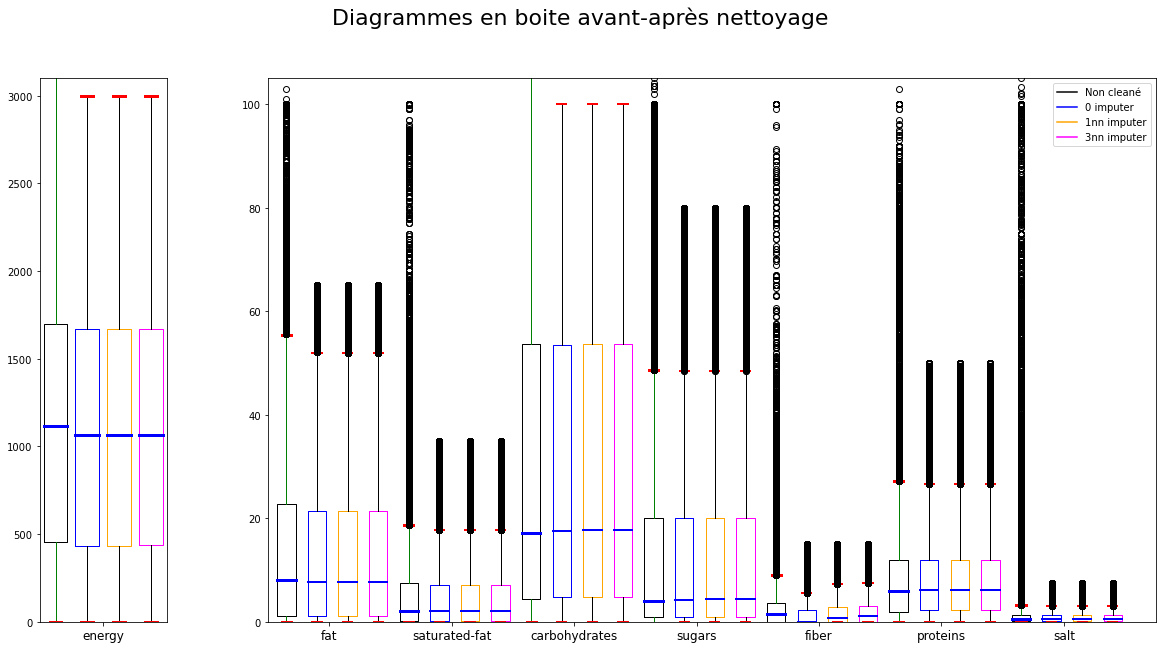

In [42]:
import matplotlib

gs = matplotlib.gridspec.GridSpec(1, 2,width_ratios = [1, 7])

#On va représenter ces différentes variables dans un diagramme en boite:
fig=plt.figure(figsize=(20,10))

#On en fait une spéciale énergie car les valeurs y sont particulièrement plus grandes:

plt.subplot(gs[0,0])
init=plt.boxplot([raw_data['energy_100g'].dropna(how='any')],showfliers=True,positions=[2],widths=3)
zeros=plt.boxplot([data0['energy_100g'].dropna(how='any')],showfliers=True,positions=[6],widths=3)
knn_1=plt.boxplot([data1['energy_100g'].dropna(how='any')],showfliers=True,positions=[10],widths=3)
knn_3=plt.boxplot([data3['energy_100g'].dropna(how='any')],showfliers=True,positions=[14],widths=3)

plt.gca().xaxis.set_ticks([8]) #position des légendes des abscisses
plt.gca().xaxis.set_ticklabels(['energy'],size=12) #caractéristiques des légendes
for element in init['medians']:
    element.set_color('blue')
    element.set_linewidth(3)
for element in init['caps']:
    element.set_color('red')
    element.set_linewidth(3)
for element in init['whiskers']:
    element.set_color('green')

for element in zeros['medians']:
    element.set_color('blue')
    element.set_linewidth(3)
for element in zeros['caps']:
    element.set_color('red')
    element.set_linewidth(3)
for element in zeros['boxes']:
    element.set_color('blue')

for element in knn_1['boxes']:
    element.set_color('orange')
for element in knn_1['medians']:
    element.set_color('blue')
    element.set_linewidth(3)
for element in knn_1['caps']:
    element.set_color('red')
    element.set_linewidth(3)

for element in knn_3['boxes']:
    element.set_color('magenta')
for element in knn_3['medians']:
    element.set_color('blue')
    element.set_linewidth(3)
for element in knn_3['caps']:
    element.set_color('red')
    element.set_linewidth(3)

plt.xlim(0,16)
plt.ylim(0,3100)

#on fait les autres diagrammes en boite

a=raw_data.columns.tolist()[4:]


plt.subplot(gs[0,1])
raw=plt.boxplot([raw_data[g].dropna(how='any') for g in a],positions=[20*i+23 for i in range(len(a))],showfliers= True,widths= 3)
zero=plt.boxplot([data0[g] for g in a],positions=[20*i+28 for i in range(len(a))],showfliers= True,widths= 3)
nn1=plt.boxplot([data1[g] for g in a],positions=[20*i+33 for i in range(len(a))],showfliers= True,widths= 3)
nn3=plt.boxplot([data3[g] for g in a],positions=[20*i+38 for i in range(len(a))],showfliers= True,widths= 3)

plt.gca().xaxis.set_ticks(range(30,170,20))    
plt.gca().xaxis.set_ticklabels([i.split('_')[0] for i in a],size=12)

for element in raw['medians']:
    element.set_color('blue')
    element.set_linewidth(3)
for element in raw['caps']:
    element.set_color('red')
    element.set_linewidth(3)
for element in raw['whiskers']:
    element.set_color('green')

for element in zero['medians']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in zero['caps']:
    element.set_color('red')
    element.set_linewidth(2)
for element in zero['boxes']:
    element.set_color('blue')

for element in nn1['medians']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in nn1['caps']:
    element.set_color('red')
    element.set_linewidth(2)
for element in nn1['boxes']:
    element.set_color('orange')

for element in nn3['medians']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in nn3['caps']:
    element.set_color('red')
    element.set_linewidth(2)
for element in nn3['boxes']:
    element.set_color('magenta')
    
    
plt.xlim(20,165)
plt.ylim(0,105)

import matplotlib.lines as mlines
legend1 = mlines.Line2D([], [], color='black',label='Non cleané')
legend2 = mlines.Line2D([], [], color='blue',label='0 imputer')
legend3 = mlines.Line2D([], [], color='orange',label='1nn imputer')
legend4 = mlines.Line2D([], [], color='magenta',label='3nn imputer')
plt.legend(handles=[legend1,legend2,legend3,legend4])


plt.suptitle('Diagrammes en boite avant-après nettoyage',size=22)
plt.show()

In [43]:
data3.isnull().sum()

code                     0
product_name          2066
nutriscore_score         0
energy_100g              0
fat_100g                 0
saturated-fat_100g       0
carbohydrates_100g       0
sugars_100g              0
fiber_100g               0
proteins_100g            0
salt_100g                0
dtype: int64

In [44]:
#On part sur le dataset: data3 les données y ont l'air plus propre

In [45]:

final=data3.copy()

In [46]:
#On va regarder les corrélations entre variables pour éviter de sélectionner plusieurs variables
#corrélées afin d'éviter un sur-apprentissage
col=final.columns.tolist()[2:]
corel=pd.DataFrame(col)
correlation=[]
for i in col:
    corele=[abs(st.pearsonr(final[i],final[j])[0]) for j in col if j not in correlation]
    corele=[0 for i in range(len(correlation))]+corele
    corel[i]=np.array(corele)
    correlation.append(i)

In [47]:
corel.set_index(0)
corel.style.background_gradient(cmap='Blues')

,0,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,nutriscore_score,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,energy_100g,0.628983,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,fat_100g,0.600338,0.771090,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,saturated-fat_100g,0.666869,0.583960,0.747319,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,carbohydrates_100g,0.279391,0.577551,0.003733,0.000527,1.000000,0.000000,0.000000,0.000000,0.000000
5,sugars_100g,0.466238,0.374054,0.048953,0.156138,0.642175,1.000000,0.000000,0.000000,0.000000
6,fiber_100g,0.103952,0.401660,0.210517,0.007838,0.384202,0.081319,1.000000,0.000000,0.000000
7,proteins_100g,0.121183,0.323396,0.373075,0.304915,0.197114,0.300756,0.100274,1.000000,0.000000
8,salt_100g,0.329705,0.105241,0.194505,0.101140,0.170973,0.282526,0.064406,0.377972,1.000000


In [48]:
#On enlève les graisses et les carbohydrates:
features=['energy_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']

In [49]:
#On passe à la régression linéaire:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import time

In [50]:
final.head()

,code,product_name,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000100,moutarde au moût de raisin,18.0,936.0,8.2,2.2,29.0,22.0,0.000000,5.1,4.60
1,0000000000949,Salade de carottes râpées,1.0,134.0,0.3,0.1,5.3,3.9,0.933333,0.9,0.42
2,0000000001281,Tarte noix de coco,14.0,1594.0,22.0,15.5,27.3,21.9,4.400000,4.6,0.10
3,0000000001885,Compote de poire,-2.0,657.0,0.0,0.0,36.0,27.0,3.600000,0.6,0.00
4,0000000002257,Salade de macedoine de légumes,1.0,598.0,12.7,1.0,3.9,1.0,0.000000,1.9,0.27


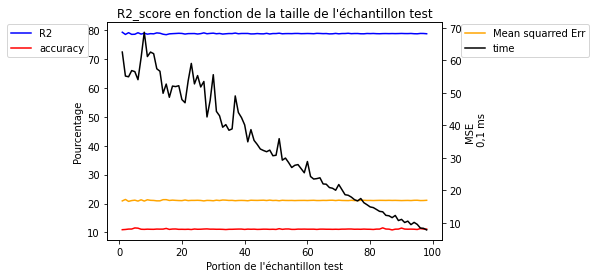

In [215]:
import time
def sumsq(x,y):
    return sum((x - y)**2)
def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

R2=[]
temps=[]
accuracy=[]
MSE=[]

#On partage notre échantillon en lots d'apprentissages de tailles croissantes
for i in range(1,99):
    
    xtrain, xtest, ytrain, ytest = train_test_split(final[features], final[['nutriscore_score']],\
                                                        test_size=0.01*i)

    s=time.time()
    lr = LinearRegression()
    linreg = lr.fit(xtrain.values, ytrain.values)
    pred = linreg.predict(xtest.values).astype(int)
    t=time.time()-s
    
    temps.append(1000*t)
    R2.append(100*r2score(pred[:,0], ytest['nutriscore_score']))
    accuracy.append(100*accuracy_score(pred, ytest['nutriscore_score']))
    MSE.append(mean_squared_error(pred, ytest['nutriscore_score']))
    
X=[i for i in range(1,99)]

plt.title("R2_score en fonction de la taille de l'échantillon test")
plt.xlabel("Portion de l'échantillon test")
r2=plt.plot(X,R2,color='blue',label='R2')
acc=plt.plot(X,accuracy,color='red',label='accuracy')
plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(-.05, 1), loc='upper right', borderaxespad=0.2)
plt.ylabel('Pourcentage')
ax2 = plt.gca().twinx()
mean=plt.plot(X,MSE,color='orange',label='Mean squarred Err')
t=plt.plot(X,temps,color='black',label='time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.2)
plt.ylabel('MSE \n 0,1 ms')

plt.show()

In [244]:
#Il n'y a pas de grandes variations de résultats. On va prendre pour le test 20% de l'échantillon.
#On va maintenant comparer les méthode ridge, lasso et la régression linéaire normale.
xtrain, xtest, ytrain, ytest = train_test_split(final[features], final[['nutriscore_score']],test_size=0.2)

In [245]:
xtest

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
295180,1846.0,1.90,35.00,1.500000,4.20,0.630
16391,1230.0,4.41,5.88,2.900000,5.88,2.205
228572,2243.0,1.79,0.00,7.100000,14.29,2.590
519076,1682.0,20.00,0.00,0.000000,32.00,1.600
464562,1321.0,13.00,14.00,1.133333,8.30,0.580
...,...,...,...,...,...,...
132651,209.0,0.00,10.00,1.400000,0.71,0.000
143741,192.0,0.00,8.75,0.000000,0.83,0.015
186049,937.0,7.46,17.91,0.000000,2.99,0.130
533063,640.0,6.80,3.50,0.000000,11.00,2.500


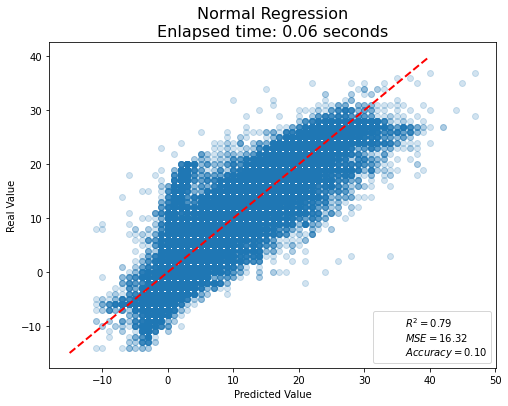

In [279]:
import time

start=time.time()

lr = LinearRegression()
linreg = lr.fit(xtrain, ytrain)
pred = linreg.predict(xtest).round()

time=time.time()-start

R2=r2score(pred[:,0], ytest['nutriscore_score'])
accuracy=accuracy_score(pred, ytest['nutriscore_score'])
MSE=mean_squared_error(pred, ytest['nutriscore_score'])
    
fig=plt.figure(figsize=(8,6))
plt.plot([-15,40],[-15,40],'--r', linewidth=2)
plt.scatter(pred,ytest,alpha=0.2)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$R^2={:.2f}$' + '\n' + r'$MSE={:.2f}$'+ '\n' + r'$Accuracy={:.2f} $').\
                     format(R2,MSE,accuracy)], loc='lower right')
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')

plt.title(('Normal Regression' + '\n' + 'Enlapsed time: {:.2f} seconds').format(time),size=16)
plt.show()

# Ridge

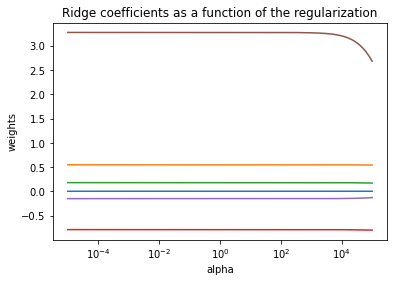

In [54]:
#On va essayer plusieurs valeurs de l'hyper paramètres
from sklearn import linear_model
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(xtrain, ytrain)
    coefs.append(ridge.coef_[0])
    errors.append(mean_squared_error(ridge.predict(xtest), ytest['nutriscore_score']))

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

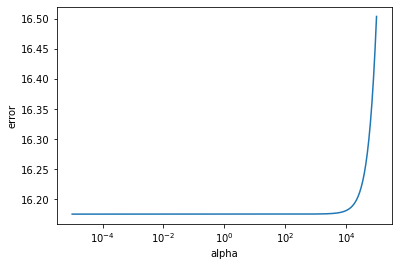

In [55]:


ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [ ]:
#Au final toutes les variables semblent pertinentes. On va maintenant chercher le paramètre qui minimise
#l'erreur mean squared par une validation croisée

In [272]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':np.logspace(-5, 5, n_alphas)}

Ridge_reg= GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error',cv=5)

Ridge_reg.fit(xtrain,ytrain)

ridge_param=Ridge_reg.best_params_

print(ridge_param)



{'alpha': 14.251026703029963}


In [273]:
ridge_param['alpha']

14.251026703029963

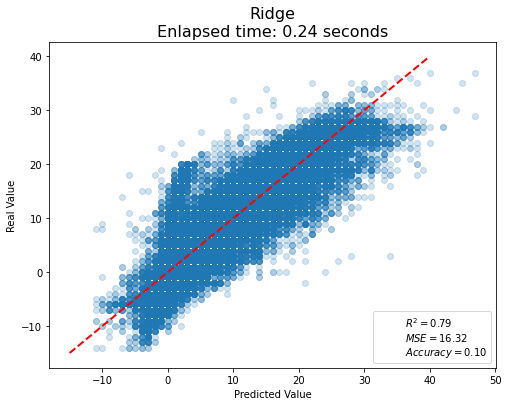

In [280]:
#On regarde ce que ça donne pour ce paramètre
import time
from sklearn.linear_model import RidgeCV

start=time.time()

ridge=RidgeCV([ridge_param['alpha']],cv=5).fit(xtrain,ytrain)



pred = ridge.predict(xtest).round()

time=time.time()-start

R2=r2score(pred[:,0], ytest['nutriscore_score'])
accuracy=accuracy_score(pred, ytest['nutriscore_score'])
MSE=mean_squared_error(pred, ytest['nutriscore_score'])
    
fig=plt.figure(figsize=(8,6))
plt.plot([-15,40],[-15,40],'--r', linewidth=2)
plt.scatter(pred,ytest,alpha=0.2)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$R^2={:.2f}$' + '\n' + r'$MSE={:.2f}$'+ '\n' + r'$Accuracy={:.2f} $').\
                     format(R2,MSE,accuracy)], loc='lower right')
plt.title(('Ridge' + '\n' + 'Enlapsed time: {:.2f} seconds').format(time),size=16)
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')
plt.show()

In [60]:
#avec le lasso

In [66]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(xtrain, ytrain)
    coefs.append(lasso.coef_)
    errors.append(mean_squared_error(lasso.predict(xtest), ytest['nutriscore_score']))

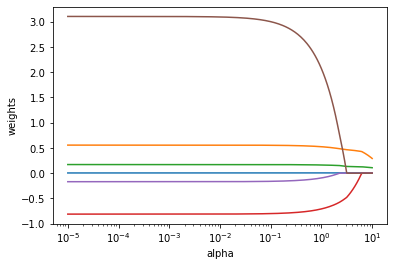

In [67]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

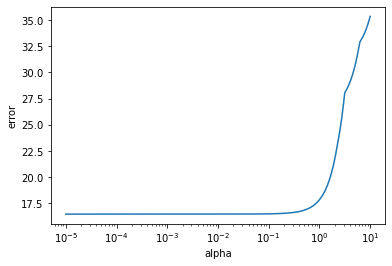

In [379]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [277]:
#Je recherche mon meilleur paramètre
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':np.logspace(-5, 5, n_alphas)}

Lasso_reg= GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error',cv=5)

Lasso_reg.fit(xtrain,ytrain)

lasso_param=Lasso_reg.best_params_

print(lasso_param)


{'alpha': 6.856782936641738e-05}


temps de calcul:  0.6297342777252197  ms 
 R2:  0.7947621199336734 
 Précision:  10.401302298809224  % 
 Mean Squarred Error:  16.315888405223586


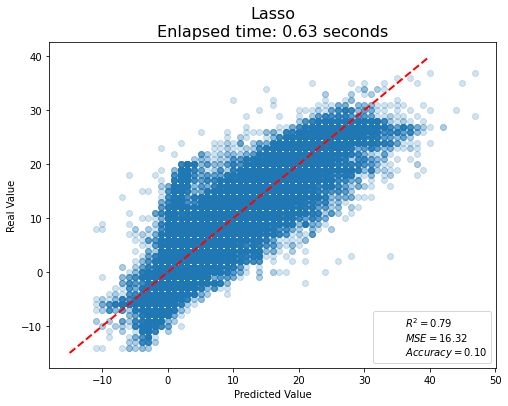

In [282]:
#Je regarde ce que ça donne pour ce paramètre
import time
from sklearn.linear_model import LassoCV

start=time.time()

lasso=LassoCV(alphas=[lasso_param['alpha']],cv=5).fit(xtrain,ytrain['nutriscore_score'])
pred = lasso.predict(xtest).round()

    
time=time.time()-start
R2=r2score(pred, ytest['nutriscore_score'])
accuracy=accuracy_score(pred, ytest['nutriscore_score'])
MSE=mean_squared_error(pred, ytest['nutriscore_score'])
    
print('temps de calcul: ',time,' ms','\n','R2: ',R2,'\n','Précision: ',accuracy*100,' %','\n','Mean Squarred Error: ',MSE)

fig=plt.figure(figsize=(8,6))
plt.plot([-15,40],[-15,40],'--r', linewidth=2)
plt.scatter(pred,ytest,alpha=0.2)
extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra], [(r'$R^2={:.2f}$' + '\n' + r'$MSE={:.2f}$'+ '\n' + r'$Accuracy={:.2f} $').\
                     format(R2,MSE,accuracy)], loc='lower right')
plt.title(('Lasso' + '\n' + 'Enlapsed time: {:.2f} seconds').format(time),size=16)
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')
plt.show()


In [283]:
#Au final on a exactement les mêmes résultat, cela confirme qu'il n'y a pas de sur-apprentissage et 
#on choisit donc la régression linéaire simple qui est beaucoup plus rapide.

# Programme de lecture de code barre et de fourniture du nutriscore

In [142]:
#La lecture du code barre nous donne le code on prend par exemple les madeleines de code:
code=3178530414431
produit=pd.read_csv('madeleine.csv') #Ou plutot produit=raw_data[raw_data.code==3178530414431]

In [243]:
#Je selectionne uniquement les colonnes qui m'intéresse:
ingredients=['saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']
product=produit[['energy_100g']+ingredients]
#Je regarde si des cases sont vides:
if product.isnull().any().any():
#si que des nan
    if product.isnull().any().all():
        print("impossible à calculer, aucune valeur d'ingrédient ni valeur énergétique disponible")
    else:
#Je regarde si j'ai qq chose qui manque dans les ingrédients et effectue si besoin le knn imputer:
        if product[ingredients].isnull().any().any():
            df=final[ingredients]
            df=pd.concat([df,product[ingredients]])
            #j'effectue le knn imputer
            prod=imputer3.fit_transform(df)[-1,:]
            energy=np.array([product.iloc[0].values[0]]+list(prod))
        else:
            energy=product.values
#Je regarde si j'ai qq chose qui manque en énergie et effectue si besoin le knn imputer:
        if np.isnan(energy).any():
            df=final[['energy_100g']+ingredients]
            df=pd.concat([df,energy])
            #j'effectue le knn imputer
            produitplein=imputer3.fit_transform(df)[-1,:]
        else:
            produitplein=energy

#J'ai maintenant dans produitplein toutes les valeurs dont j'ai besoin. 
#J'effectue ma régression linéaire et renvois le résultat
print(linreg.predict([produitplein]).round()[0][0])        

19.0


In [ ]:
produit=raw_data[raw_data.code=code_barre]